# Final Project – Milestone #4: Exploratory Data Analysis (EDA)  
**Author:** Maricarl Sibal  
**Date:** May 3, 2025

This notebook continues the final project by conducting exploratory data analysis (EDA) on the cleaned Online Retail dataset. The objective of this milestone is to answer key business questions through data aggregation and visualizations. The insights gained will support strategic recommendations in the final summary and presentation.

## Import Libraries and Load Dataset
This section imports the required Python libraries and loads the cleaned Online Retail dataset from the Excel file. These tools will support data aggregation, visualization, and business insight generation throughout the analysis.

In [4]:
# Import libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

# Set a consistent visual style for all plots
sns.set(style='whitegrid')

# Load the cleaned Online Retail dataset
df = pd.read_excel("Online Retail.xlsx")

# Display the first five rows of the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Data Cleaning Recap
To ensure consistency with the previous milestone, the same data cleaning steps are applied here. These include removing missing and invalid values, renaming columns for consistency, and engineering additional features required for analysis. This ensures that all insights are based on a clean and standardized dataset.

In [6]:
# Remove records with missing CustomerID values
df = df.dropna(subset=['CustomerID'])

# Filter out records with non-positive Quantity or UnitPrice values
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Standardize column names: lowercase and replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Create a new column to calculate revenue per transaction
df['revenue'] = df['quantity'] * df['unitprice']

# Convert invoicedate to datetime format and extract the month name
df['invoicedate'] = pd.to_datetime(df['invoicedate'])
df['month'] = df['invoicedate'].dt.month_name()

## Question 1: What times of year see the highest sales volumes?
Understanding which months generate the highest revenue helps businesses make informed decisions about inventory management, staffing, and promotional strategies. This analysis identifies monthly sales trends based on total revenue.

In [8]:
# Define the correct calendar month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Group total revenue by month and reindex to match calendar order
monthly_revenue = df.groupby('month')['revenue'].sum().reindex(month_order).dropna()

# Display the monthly revenue values
monthly_revenue

month
January       569445.040
February      447137.350
March         595500.760
April         469200.361
May           678594.560
June          661213.690
July          600091.011
August        645343.900
September     952838.382
October      1039318.790
November     1161817.380
December     1090906.680
Name: revenue, dtype: float64

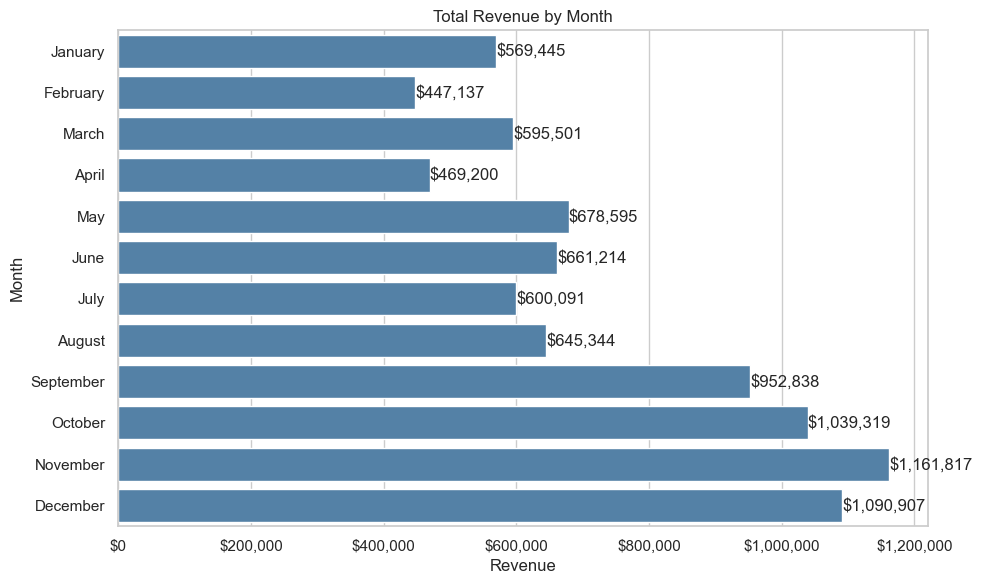

In [9]:
# Plot total revenue by month
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_revenue.values, y=monthly_revenue.index, color='steelblue')
plt.title("Total Revenue by Month")
plt.xlabel("Revenue")
plt.ylabel("Month")

# Add labels to each bar
for index, value in enumerate(monthly_revenue.values):
    plt.text(value, index, f'${value:,.0f}', va='center')

# Format x-axis
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

## Question 2: What are the most popular product categories?
This analysis identifies the top-selling products based on total quantity sold. Understanding which items are in highest demand can help guide inventory planning, marketing strategies, and promotional focus.

In [11]:
# Group by product description and sum total quantity sold
top_products = df.groupby('description')['quantity'].sum().sort_values(ascending=False).head(10)

# Display the top 10 products by quantity sold
top_products

description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
Name: quantity, dtype: int64

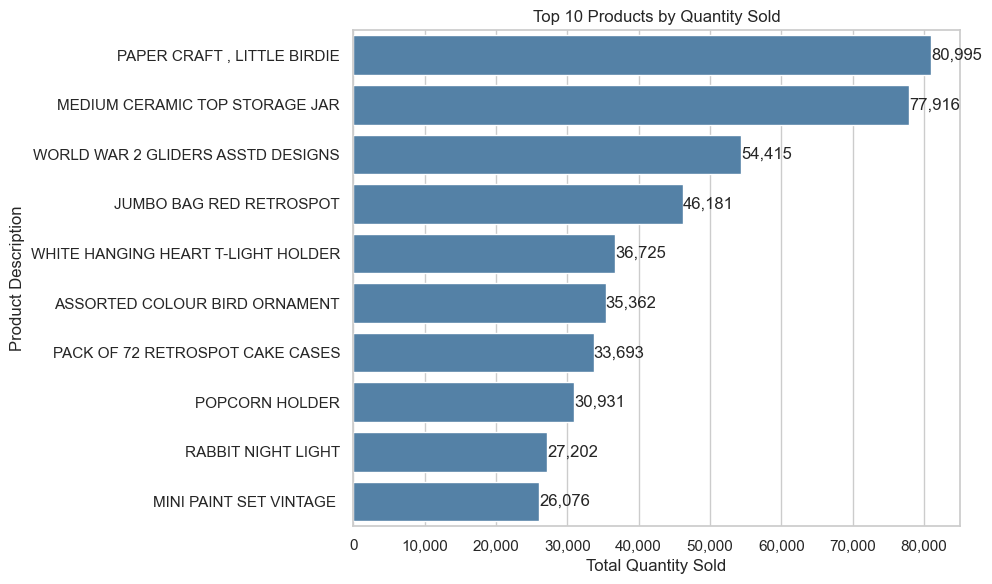

In [12]:
# Plot the top 10 most frequently sold products
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, color='steelblue')
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Description")

# Add labels to each bar
for index, value in enumerate(top_products.values):
    plt.text(value, index, f'{value:,.0f}', va='center')

plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.tight_layout()
plt.show()

## Question 3: Which products generate the highest total revenue?
This analysis identifies the top 10 products that generated the highest revenue across all transactions. Revenue is calculated as the product of `Quantity` and `UnitPrice`. These insights can help the business prioritize top-performing products in inventory planning, marketing, and promotional efforts.

In [14]:
# Group products by description and calculate total revenue
product_revenue = df.groupby('description')['revenue'].sum().sort_values(ascending=False)

# Select the top 10 products by revenue
top_10_revenue_products = product_revenue.head(10)

# Display the top revenue-generating products
top_10_revenue_products

description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: revenue, dtype: float64

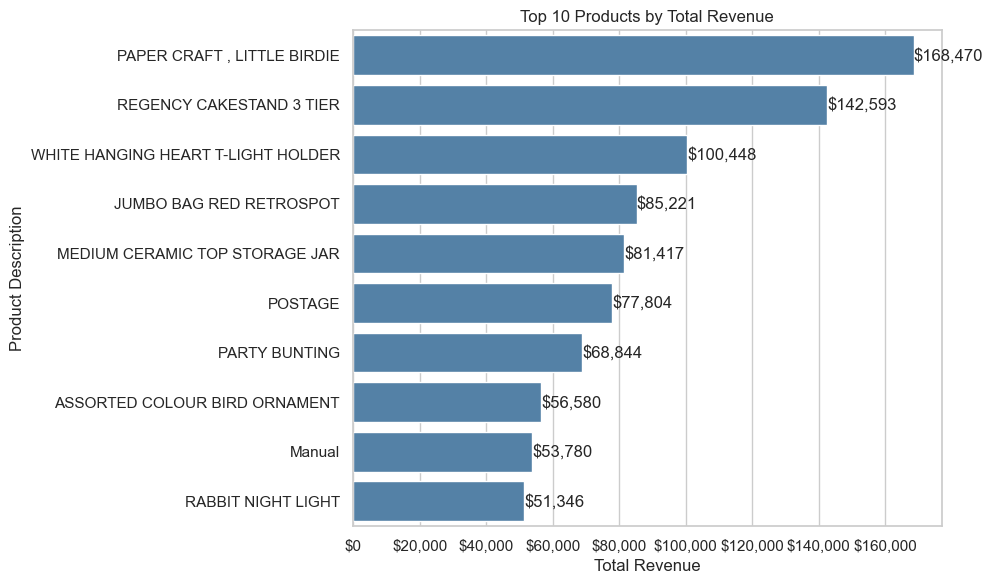

In [15]:
# Plot the top 10 products by total revenue
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_revenue_products.values, y=top_10_revenue_products.index, color='steelblue')
plt.title("Top 10 Products by Total Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Product Description")

# Add revenue labels to each bar
for index, value in enumerate(top_10_revenue_products.values):
    plt.text(value, index, f'${value:,.0f}', va='center')

plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

## Question 4: Which countries generate the most revenue?
This analysis identifies the top-performing countries based on total revenue. These insights can support international business strategy, including market expansion, localized promotions, and regional inventory planning.

In [17]:
# Group total revenue by country and sort in descending order
country_revenue = df.groupby('country')['revenue'].sum().sort_values(ascending=False).head(10)

# Display the top 10 countries by revenue
country_revenue

country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Australia          138521.310
Spain               61577.110
Switzerland         56443.950
Belgium             41196.340
Sweden              38378.330
Name: revenue, dtype: float64

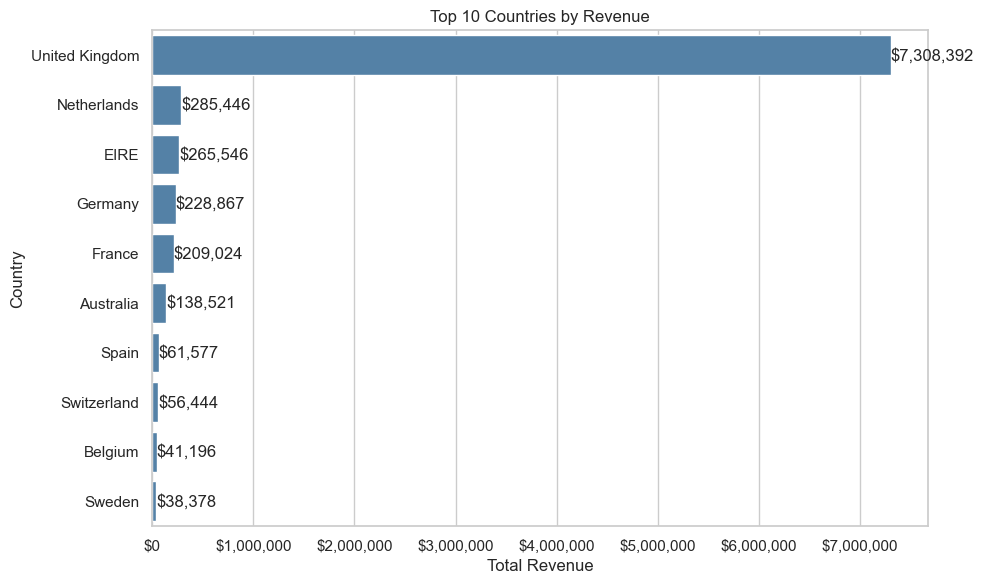

In [18]:
# Plot the top 10 countries by total revenue
plt.figure(figsize=(10, 6))
sns.barplot(x=country_revenue.values, y=country_revenue.index, color='steelblue')
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Country")

# Add revenue labels to each bar
for index, value in enumerate(country_revenue.values):
    plt.text(value, index, f'${value:,.0f}', va='center')

plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

## Key Data Points for Summary
The following values represent key insights derived from the analysis and are referenced in the summary and final presentation:

In [20]:
# Monthly revenue peak
print("Peak Month:")
print(monthly_revenue.sort_values(ascending=False).head(1))

# Top 2 products by quantity sold
print("\nTop-Selling Products (by Quantity):")
print(top_products.head(2))

# Top 2 products by revenue
print("\nTop Products by Total Revenue:")
print(top_10_revenue_products.head(2))

# Top 3 countries by revenue
print("\nTop Revenue-Generating Countries:")
print(country_revenue.head(3))

Peak Month:
month
November    1161817.38
Name: revenue, dtype: float64

Top-Selling Products (by Quantity):
description
PAPER CRAFT , LITTLE BIRDIE       80995
MEDIUM CERAMIC TOP STORAGE JAR    77916
Name: quantity, dtype: int64

Top Products by Total Revenue:
description
PAPER CRAFT , LITTLE BIRDIE    168469.60
REGENCY CAKESTAND 3 TIER       142592.95
Name: revenue, dtype: float64

Top Revenue-Generating Countries:
country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Name: revenue, dtype: float64


## Summary of Insights

- **Seasonal Trends:**  
  The highest sales volumes occurred in **November**, with total revenue reaching **\$1,161,817.38**. This surge is likely driven by seasonal shopping behavior such as holiday preparations. Businesses should consider scaling up inventory and marketing efforts during late Q4 to align with this demand.

- **Product Trends (Quantity):**  
  The most frequently sold products were **PAPER CRAFT , LITTLE BIRDIE** (80,995 units) and **MEDIUM CERAMIC TOP STORAGE JAR** (77,916 units), reflecting high customer interest in craft and home organization items. These products may benefit from prioritized restocking and promotional placement.

- **Product Trends (Revenue):**  
  The top revenue-generating items were **PAPER CRAFT , LITTLE BIRDIE** (\$168,469.60) and **REGENCY CAKESTAND 3 TIER** (\$142,592.95). These products should be highlighted in marketing campaigns and inventory planning due to their strong financial contribution.

- **Geographic Insights:**  
  The **United Kingdom** generated the highest revenue (\$7,308,391.55), followed by **Netherlands** (\$285,446.34) and **EIRE** (\$265,545.90). This concentration suggests maintaining focus on the UK market while exploring regional growth opportunities in high-performing European countries.

These findings provide actionable insights for optimizing inventory management, promotional strategy, and international business focus. Future analysis could include customer segmentation or time-based revenue forecasting to support more granular decision-making.